In [2]:
import numpy as np
import matplotlib.pyplot as plt

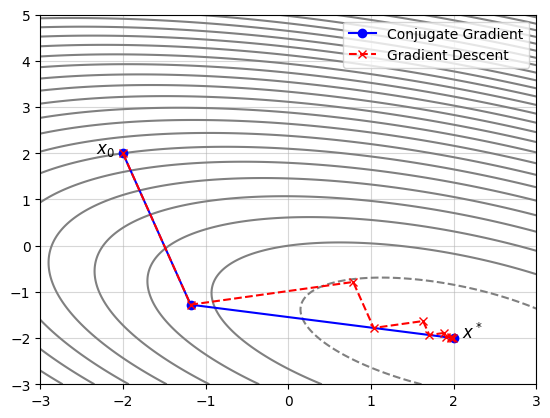

In [12]:
# Define the quadratic function: f(x) = 0.5 x^T A x - b^T x
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])
x_star = np.linalg.solve(A, b)  # exact minimizer

# Define function and gradient
def f(x):
    return 0.5 * x.T @ A @ x - b.T @ x

def grad_f(x):
    return A @ x - b

# Gradient descent with optimal step size
def gradient_descent(x0, steps):
    x = x0
    path = [x0]
    for _ in range(steps):
        r = grad_f(x)
        alpha = r.T @ r / (r.T @ A @ r)
        x = x - alpha * r
        path.append(x)
    return np.array(path)

# Conjugate gradient (exact for 2D quadratics in 2 steps)
def conjugate_gradient(x0):
    x = x0
    r = grad_f(x)
    p = -r
    path = [x0]
    for _ in range(2):
        Ap = A @ p
        alpha = r.T @ r / (p.T @ Ap)
        x = x + alpha * p
        r_new = r + alpha * Ap
        beta = r_new.T @ r_new / (r.T @ r)
        p = -r_new + beta * p
        r = r_new
        path.append(x)
    return np.array(path)

# Initialize
x0 = np.array([-2.0, 2.0])
gd_path = gradient_descent(x0, steps=10)
cg_path = conjugate_gradient(x0)

# Contour plot setup
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[f(np.array([x, y])) for x in x_vals] for y in y_vals])

# Plot
plt.contour(X, Y, Z, levels=30, colors='gray')
plt.plot(cg_path[:, 0], cg_path[:, 1], 'o-b', label='Conjugate Gradient')
plt.plot(gd_path[:, 0], gd_path[:, 1], 'x--r', label='Gradient Descent')
plt.text(-2.1, 2.0, '$x_0$', fontsize=12, ha='right')
plt.text(2.1, -2.0, '$x^*$', fontsize=12, ha='left')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('figures/conjugate_gradient.pdf')